In [256]:
import numpy as np
import os
import cv2
from sklearn.utils import shuffle
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D



#data_list=[]

In [257]:

data_path = 'G:\mchine learning\CK+48'
data_list = os.listdir(data_path)

img_data = []

#root_dir = 'G:\mchine learning\CK+48'
#for dataset in os.listdir(data_list):
#    img_list = os.listdir(os.path.join(data_path, dataset))
#    for img in data_list:
#        input_img = cv2.imread(img)
#        # Process the image further
#        img_resize = cv2.resize(img, (46, 46))
#        img_data.append(img_resize)


for dataset in os.listdir(data_path):
    # Use os.path.join to create the correct path to the images
    img_list = os.listdir(os.path.join(data_path, dataset))
    for img in img_list:
        input_img = cv2.imread(os.path.join(data_path, dataset, img))
        # Process the image further
        img_resize = cv2.resize(input_img, (46, 46))
        img_data.append(img_resize)
input_img = cv2.imread(os.path.join(data_path, dataset, img))


#data = np.array(img_data)
data = np.array(img_data)
data = data.astype('float32')
data = data/255.0
data.shape



(981, 46, 46, 3)

In [258]:

num_class=len(data_list)
num_samples=data.shape[0]

In [259]:
# label data in six classes equal number of folders
labels=np.ones((num_samples,),dtype='int64')
labels[0:135]=0          #anger
labels[135:189] =1       #contempt
labels[189:366] = 2      #disgust
labels[366:441]=3        #fear
labels[441:648]=4        #happy
labels[648:732]=5        #sadness
labels[732:981]=6        #happy

#names=data_list
img_labels=np_utils.to_categorical(labels,num_class)              #to classify the imges 

In [260]:
# shuffel the data
x_img,y_img=shuffle(data,img_labels,random_state=2)

In [261]:
#split training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_img,y_img,test_size=0.2,random_state=2)


In [262]:
#x_img

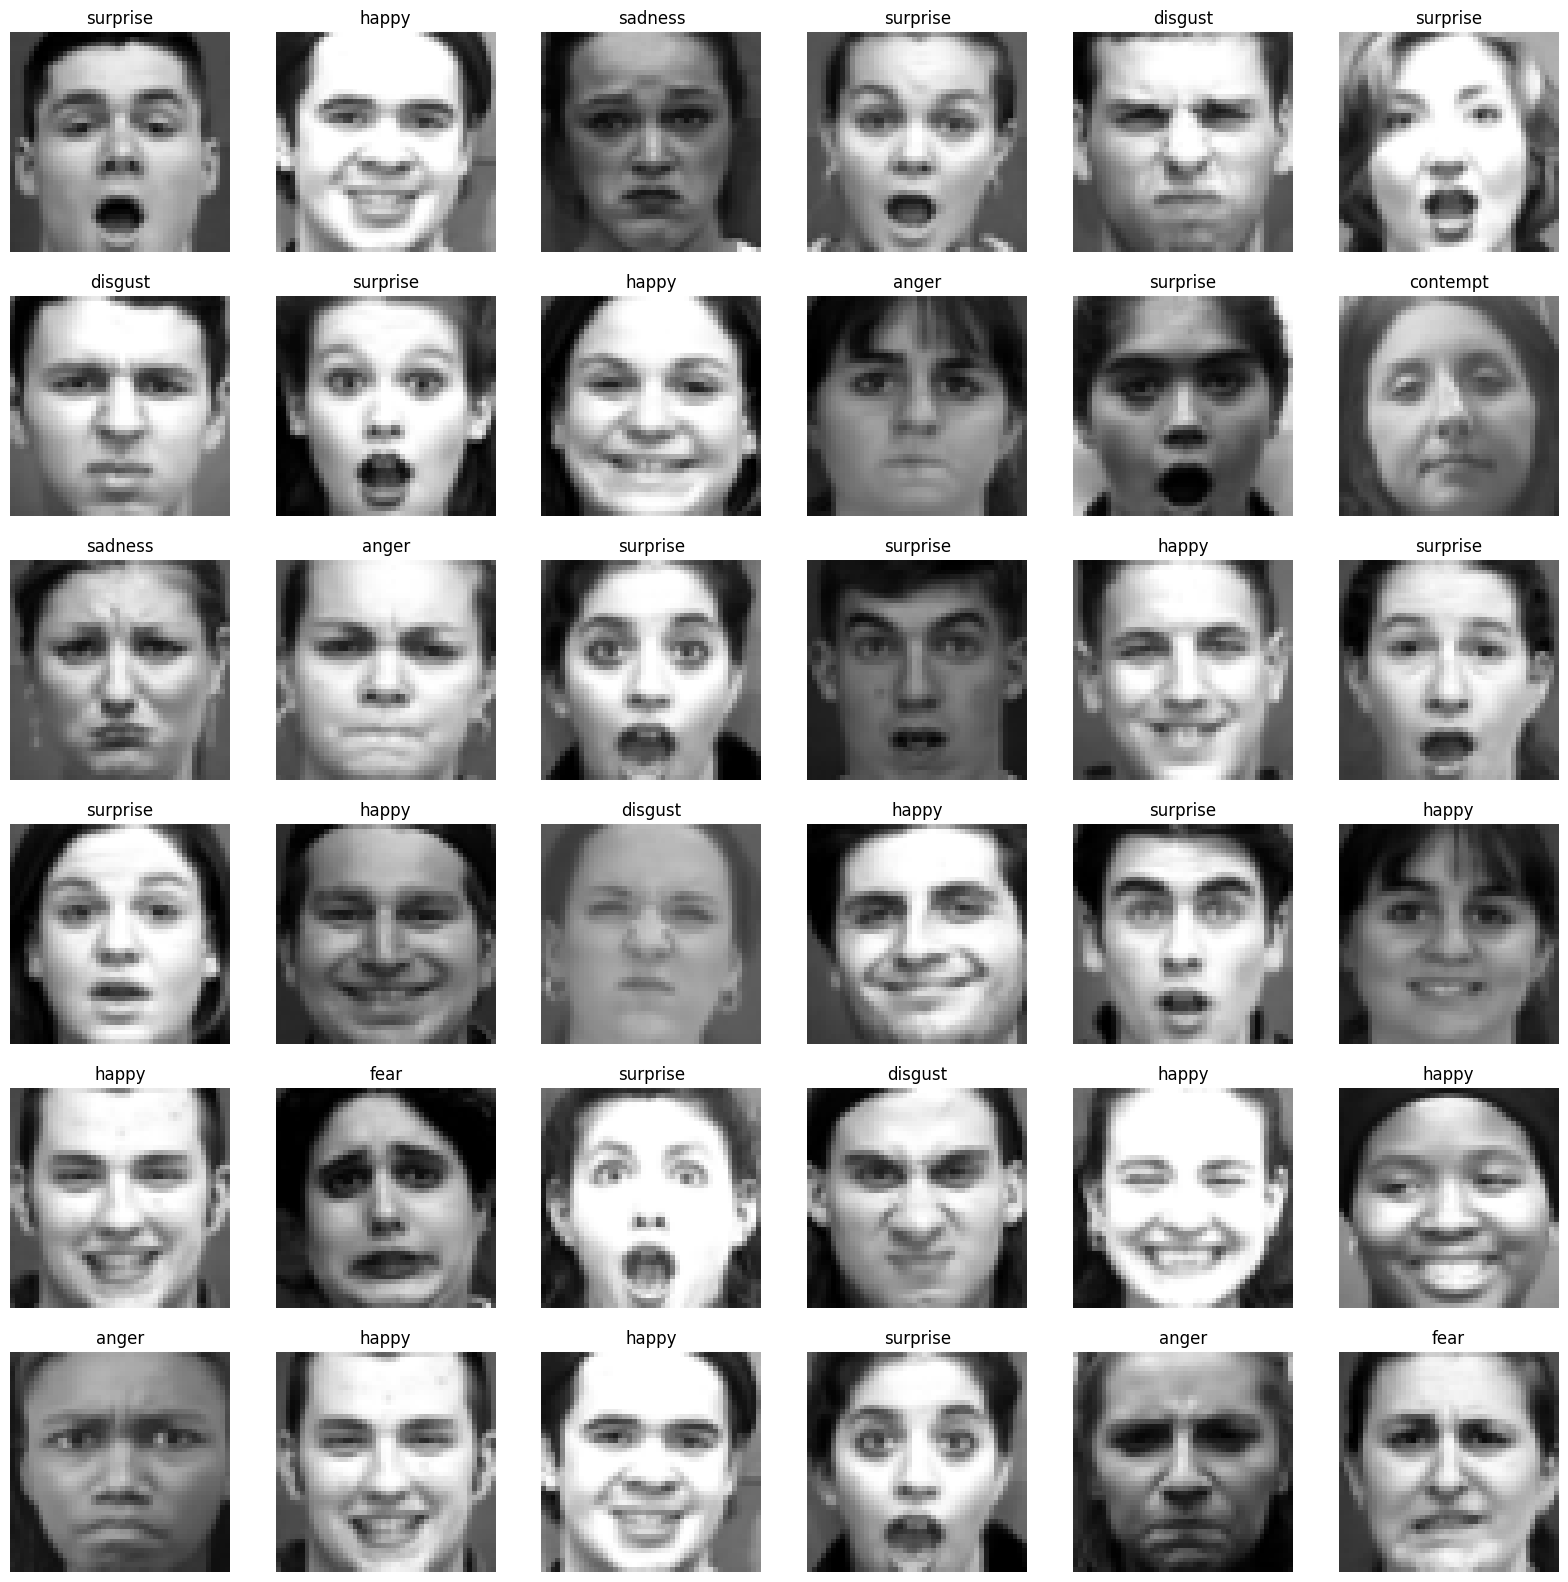

In [263]:


plt.figure(figsize=(20, 20))

if len(x_img) >= 36:
    random_indices = np.random.randint(0, len(x_img), 36)
    for i, j in enumerate(random_indices):
        plt.subplot(6, 6, i + 1)
        plt.imshow(x_img[j])
        plt.axis('off')
        plt.title(data_list[np.argmax(y_img[j])])

plt.show()


In [264]:


#conv2D, Maxpoo    lin                  g2D

def create_model():
    input_shape = (46, 46, 3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape,
                     padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  metrics=['accuracy'], optimizer='adam')
    return model


In [265]:
model = create_model()

history =model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test))



Epoch 1/20
25/25 [==============================] - 14s 336ms/step - loss: 1.8685 - accuracy: 0.2156 - val_loss: 1.7440 - val_accuracy: 0.3096
Epoch 2/20
25/25 [==============================] - 8s 306ms/step - loss: 1.7829 - accuracy: 0.3099 - val_loss: 1.5888 - val_accuracy: 0.4772
Epoch 3/20
25/25 [==============================] - 7s 299ms/step - loss: 1.4922 - accuracy: 0.4821 - val_loss: 1.1068 - val_accuracy: 0.5838
Epoch 4/20
25/25 [==============================] - 7s 290ms/step - loss: 1.0878 - accuracy: 0.6008 - val_loss: 0.8352 - val_accuracy: 0.6802
Epoch 5/20
25/25 [==============================] - 7s 264ms/step - loss: 0.8726 - accuracy: 0.6875 - val_loss: 0.6009 - val_accuracy: 0.8325
Epoch 6/20
25/25 [==============================] - 7s 270ms/step - loss: 0.6908 - accuracy: 0.7283 - val_loss: 0.5950 - val_accuracy: 0.7665
Epoch 7/20
25/25 [==============================] - 6s 247ms/step - loss: 0.6224 - accuracy: 0.7730 - val_loss: 0.4350 - val_accuracy: 0.8426
Epoch

In [266]:
def predict_unit(i):
  predictions=model.predict(x_test[i:i+1])
  plt.imshow(x_test[i])
  names[list(predictions.astype(int).flatten()).index(1)]

  plt.title(names[list(predictions.astype(int).flatten()).index(1)])






1/1 [==============================] - 1s 795ms/step


ValueError: 1 is not in list

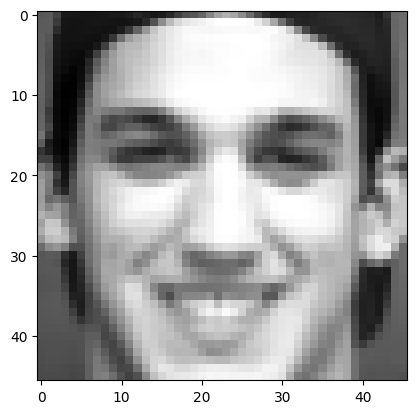

In [269]:
predict_unit(90)
#print(names[list(y_test[90]).index(90)])

In [ ]:

loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)



7/7 [==============================] - 1s 97ms/step - loss: 0.0277 - accuracy: 0.9949
Test Loss: 0.027673520147800446
Test Accuracy: 0.9949238300323486
